In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Choose train and test data
from sklearn.model_selection import train_test_split
# import the mutual information module 
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [12]:
data=pd.read_excel('./../myproj/Survey_final_1.xlsx',nrows=439)
data.head()

,Timestamp,Which age group you belong to?,Location(From which state you are?),Is it difficult to get essentials(food/medicine)?,What is your gender?,How you ever felt symptoms of COVID?,Do you have any of the following conditions?,During the lockdown have you been doing more household work?,Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID?,How often do you use masks/hand sanitizers(per day)?,...,Economy,Career,Restlessness,Lockdown,Precautious,Frustration,Anxiety Numerical,Anxiety Level,Level Of Anxiety,Cluster
0,6/19/2020 13:39:56,18-25,Tamilnadu,0,1,0,0,1,1,0,...,0,0,2,1,3,1,8,1,0 anxiety,1
1,6/19/2020 13:40:56,18-25,Tamilnadu,0,1,0,0,0,0,0,...,0,0,2,1,2,1,7,1,mild anxiety,0
2,6/19/2020 13:42:23,18-25,Tamilnadu,0,1,0,0,1,0,0,...,0,1,3,2,2,2,12,2,moderate anxiety,0
3,6/19/2020 13:51:36,18-25,Tamilnadu,0,0,0,0,0,1,1,...,2,1,1,1,2,1,9,1,0 anxiety,3
4,6/19/2020 13:51:45,18-25,Tamilnadu,0,1,0,0,0,1,1,...,0,1,1,1,3,2,9,1,0 anxiety,0


In [13]:
data.shape

(439, 38)

In [14]:
data.columns

Index(['Timestamp', 'Which age group you belong to?',
       'Location(From which state you are?)',
       'Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID?',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID?',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week)',
       'Are you in a containment zone?',
       'Are you stuck somewhere alone without support from friends or family?',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital du

In [21]:
X=data[[
       'Is it difficult to get essentials(food/medicine)?',
       'What is your gender?', 'How you ever felt symptoms of COVID?',
       'Do you have any of the following conditions?',
       'During the lockdown have you been doing more household work?',
       'Have you or anyone you know have corona virus/recovered from COVID/been tested for COVID?',
       'How often do you use masks/hand sanitizers(per day)?',
       'Do you feel like you have wasted your time during the lock down or have you ever felt pressurized by your peer’s accomplishments during the lock down?',
       'How often do you eat outside food? (per week)',
       'Are you in a containment zone?',
       'Are you stuck somewhere alone without support from friends or family?',
       'Do you have children less than 3 yrs, or elders 65+ at your house?',
       'Have you ever felt afraid or anxious to go to hospital during this pandemic?',
       'Has your sleep cycle changed drastically?',
       'Have you felt frustrated by having your activities, major life events or opportunities affected by the virus?',
       'Is someone from your family in the medical field everyday?',
       'Do you have online classes/assignments/assessments/tests?',
       'Did you face a pay cut/job loss/take another job to cover expenses?',
       'How often do you leave your house?(per week)',
       'How often do you interact with people outside your house(friends,neighbors etc.,)?',
       'Have you taken any medication to prevent corona(Chloroquine or kabasura kudineer) or any medication to increase your immunity?',
       'Have you been affected by not being able to visit religious places?',
       'Do you miss hanging out with people outside of your house?']]

In [22]:
y=data['Level Of Anxiety']

In [23]:
X.shape, y.shape

((439, 23), (439,))

In [24]:
y.isnull().sum()

0

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [26]:
mi=mutual_info_classif(X_train,y_train)

In [27]:
mi

array([0.01089232, 0.03348881, 0.        , 0.        , 0.02409268,
       0.        , 0.02748188, 0.07336896, 0.        , 0.00074066,
       0.        , 0.        , 0.0022362 , 0.00591106, 0.07091027,
       0.05208032, 0.        , 0.        , 0.02858841, 0.00184563,
       0.        , 0.00222879, 0.        ])

In [28]:
len(mi)

23

In [29]:
mi=pd.Series(mi)
mi.index=X_train.columns

In [30]:
mi.sort_values(ascending=False, inplace=True)

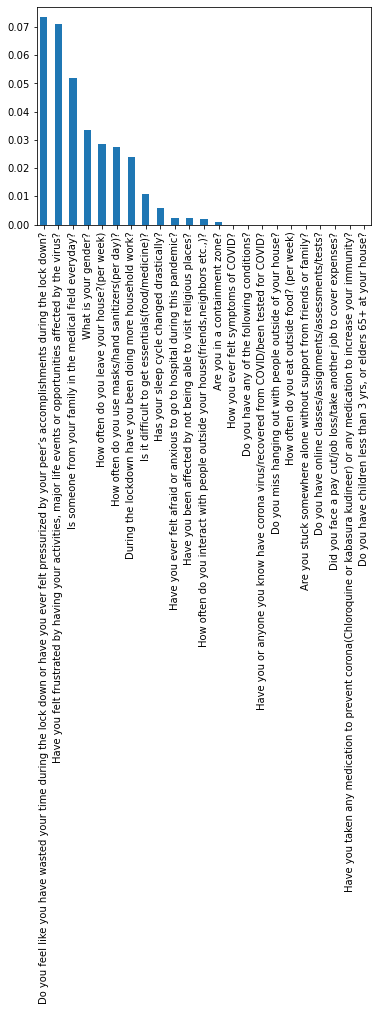

In [31]:
mi.plot.bar()

NameError: name 'kmeans' is not defined